In [1]:
from __future__ import print_function
import warnings
import numpy as np

from keras.layers import Dense,Dropout,Flatten,Input,BatchNormalization
from keras.models import Model
from keras.layers import Conv2D,MaxPooling2D,GlobalMaxPooling2D,GlobalAveragePooling2D,ZeroPadding2D,AveragePooling2D
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from keras_applications.imagenet_utils import _obtain_input_shape # this will work for older versions of keras. 2.2.0 or before
from keras.engine.topology import get_source_inputs

Using TensorFlow backend.
c:\users\hs999\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\hs999\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\hs999\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

In [2]:
def CNNupdated(input_tensor=None,classes=2):    
   
    img_rows, img_cols = 100, 100   # by default size is 224,224
    img_channels = 3

    img_dim = (img_rows, img_cols, img_channels)
   
    img_input = Input(shape=img_dim)
  #  x = ZeroPadding2D((3, 3))(img_input)
    # Block 1
    x = Conv2D(64, (11, 11),strides=(2,2), activation='relu', padding='same', name='block1_conv1')(img_input)
    x = Conv2D(64, (11, 11),strides=(2,2), activation='relu', padding='same', name='block1_conv2')(x)
    x = BatchNormalization(axis=3, name='bn_conv1')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (7, 7),strides=(2,2), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (7, 7),strides=(2,2), activation='relu', padding='same', name='block2_conv2')(x)
    x = BatchNormalization(axis=3, name='bn_conv2')(x)
   # x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)
   

    # Block 3
    x = Conv2D(256, (5, 5),strides=(2,2), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (5, 5),strides=(2,2), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (5, 5),strides=(2,2), activation='relu', padding='same', name='block3_conv3')(x)
    x = BatchNormalization(axis=3, name='bn_conv3')(x)
   # x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3),strides=(2,2), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3),strides=(2,2), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3),strides=(2,2), activation='relu', padding='same', name='block4_conv3')(x)
    x = BatchNormalization(axis=3, name='bn_conv4')(x)
   # x = MaxPooling2D((2, 2), strides=(1, 1), name='block4_pool')(x)

    # Block 5
   # x = Conv2D(512, (3, 3),strides=(2,2), activation='relu', padding='same', name='block5_conv1')(x)
   # x = Conv2D(512, (3, 3),strides=(2,2), activation='relu', padding='same', name='block5_conv2')(x)
   # x = Conv2D(512, (3, 3),strides=(2,2), activation='relu', padding='same', name='block5_conv3')(x)
   # x = BatchNormalization(axis=3, name='bn_conv5')(x)
    #x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)
    # Block 6
    #x=Conv2D(1024,(5,5),strides=(2,2),activation='relu',padding='same',name='block6_conv1')(x)
    #x=Conv2D(1024,(5,5),strides=(2,2),activation='relu',padding='same',name='block6_conv2')(x)
   # x=Conv2D(1024,(5,5),strides=(2,2),activation='relu',padding='same',name='block6_conv3')(x)
  #  x= BatchNormalization(axis=3, name='bn_conv6')(x)
   # x=MaxPooling2D((2,2),strides=(2,2),name='block6_pool')(x)
   # x = AveragePooling2D((2,2), name="avg_pool")(x)
    
    # Classification block
    x = Flatten(name='flatten')(x)
    x = Dense(512, activation='relu', name='fc1')(x)
   # x = Dense(512, activation='relu', name='fc2')(x)
    x = Dense(classes, activation='softmax', name='predictions')(x)
    
    
    #if input_tensor is not None:
        #inputs = get_source_inputs(input_tensor)
    #else:
     #   inputs = img_input
        
        
        
        
    # Create model.
   
     
    model = Model(inputs = img_input, outputs = x, name='demo')


    return model



In [3]:
model = CNNupdated(classes = 2) 

In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

x_rays = os.listdir('chest_xray\\train')


#print (room_types)  #what kinds of rooms are in this dataset

print("Types of rooms found: ", len(x_rays))

rooms = []

for item in x_rays:
 # Get all the file names
 all_rooms = os.listdir('chest_xray\\train' + '/' +item)
 #print(all_shoes)

 # Add them to the list
 for room in all_rooms:
    rooms.append((item, str('chest_xray\\train' + '/' +item) + '/' + room))
    #print(rooms[:1])

    


import cv2
path = 'chest_xray\\train\\'


im_size = 100

images = []
labels = []

for i in x_rays:
    data_path = path + str(i)  # entered in 1st folder and then 2nd folder and then 3rd folder
    #filenames = [i for i in os.listdir(data_path) if i.endswith('.jpg')]
    filenames = [i for i in os.listdir(data_path) ]
   # print(filenames)  # will get the names of all images which ends with .jpg extension
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)  # reading that image as array
        #print(img)  # will get the image as an array
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)
    

# Transform the image array to a numpy type

images = np.array(images)

#images.shape    


images = images.astype('float32') / 255.0


from sklearn.preprocessing import LabelEncoder , OneHotEncoder



#print(y[:5])

# for y
le = LabelEncoder ()
labels = le.fit_transform (labels)
#print (y)


labels=labels.reshape(-1,1)
onehotencoder = OneHotEncoder()  #Converted  scalar output into vector output where the correct class will be 1 and other will be 0
labels= onehotencoder.fit_transform(labels)
labels.shape  #(393, 3)


from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, labels = shuffle(images, labels, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(images, labels, test_size=0.05, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

Types of rooms found:  2
(4955, 100, 100, 3)
(4955, 2)
(261, 100, 100, 3)
(261, 2)


In [6]:
model.fit(train_x, train_y, epochs = 3, batch_size = 32)  


Epoch 1/3
4955/4955 [==============================] - 192s 39ms/step - loss: 0.2454 - accuracy: 0.9066
Epoch 2/3
4955/4955 [==============================] - 191s 38ms/step - loss: 0.1648 - accuracy: 0.9326
Epoch 3/3
4955/4955 [==============================] - 173s 35ms/step - loss: 0.1419 - accuracy: 0.9455


In [7]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

261/261 [==============================] - 2s 6ms/step
Loss = 0.6467010974884033
Test Accuracy = 0.8275862336158752


Input image shape: (1, 100, 100, 3)
[[1. 0.]]


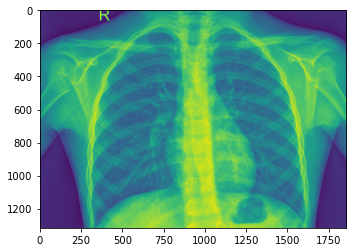

In [8]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
img_path = 'C:\\Users\\hs999\\flask-app\\X_rays data\\chest_xray\\test\\NORMAL\\IM-0001-0001.jpeg'
img = image.load_img(img_path, target_size=(100, 100))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)
my_image = imread(img_path)
imshow(my_image)
print(model.predict(x))



In [9]:
model_json=model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json )
mp = "models.h5"   # pip install h5py
model.save(mp)